#Lab 16: PCA 

##Kobie Williams 

###4/19/2022 

####The purpose of this file is to experiment with using PCA for dimensionality reduction. 

In [79]:
#3
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [80]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1vqMBid4r0C8apwYcpBQfVQ_TwEUNWY8r')

In [81]:
#4
#Splitting data from columns 0-29 to x 
X = df.iloc[:, 0:30] 

#Sending column 30 to y 
y = df.iloc[:,30:31] 

y.head(5)



,30
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 

In [83]:
#5
#Intrinsic Dimensionality 
#Creating so X has 30 components  
from sklearn.decomposition import PCA 
pca = PCA(n_components=30) 
pca.fit(X)

PCA(n_components=30)

In [84]:
#Showing the components 
pca.components_

array([[-2.01673245e-01, -4.07025390e-02, -6.78240092e-02,
        -2.04821656e-04,  4.56637997e-02, -7.28180401e-03,
         4.60060450e-01, -2.89849333e-03,  3.35174829e-01,
         1.69378172e-01,  4.01470172e-01,  5.83859634e-02,
         6.23427248e-02, -3.98692842e-03, -2.34380290e-02,
         1.59839809e-01,  1.03420136e-03, -2.18463368e-01,
         3.19116911e-01,  3.40455185e-02, -1.60905814e-01,
         4.37918157e-03, -4.15064052e-01, -2.05409998e-01,
        -5.88102188e-04, -9.53809138e-03,  1.33789791e-03,
         1.64985629e-02,  1.09948614e-01,  9.62067024e-03],
       [-2.57385403e-01,  3.60582444e-01, -5.23060133e-02,
         4.18334758e-04, -1.70609755e-01, -1.41820230e-03,
        -7.46593533e-03,  5.83527358e-03,  3.19016541e-02,
         4.59563492e-02, -2.18409991e-01, -3.15869531e-01,
         2.05745945e-01, -5.16395538e-03, -3.19669791e-01,
        -7.07946478e-02, -7.76492496e-03, -2.05810195e-01,
         2.65396890e-01, -8.41466944e-02,  2.43246119e-

In [85]:
#5
pca.explained_variance_ratio_

array([3.55577268e-01, 1.83839797e-01, 1.56723711e-01, 1.08710573e-01,
       6.14423627e-02, 1.52089771e-02, 1.48198487e-02, 1.45211860e-02,
       1.36668210e-02, 1.33087966e-02, 1.31794339e-02, 1.26573305e-02,
       1.23703890e-02, 1.21244009e-02, 1.18491053e-02, 1.67033775e-32,
       9.54194660e-33, 4.12461831e-33, 3.64145808e-33, 2.47860837e-33,
       2.37957450e-33, 2.37957450e-33, 2.37957450e-33, 2.37957450e-33,
       2.37957450e-33, 2.37957450e-33, 2.37957450e-33, 2.37957450e-33,
       2.37957450e-33, 4.89195897e-34])

###6

What we see from this is that as the number of components goes up, how much sway they have over the variance goes down. 

In [86]:
#7
#Visualization 
vis_pca = PCA(n_components=2) 
vis_pca.fit(X) 

PCA(n_components=2)

In [87]:
X_vis = vis_pca.transform(X)

(-18.929735824690265,
 19.236637650710772,
 -12.09056587282429,
 16.443814131161567)

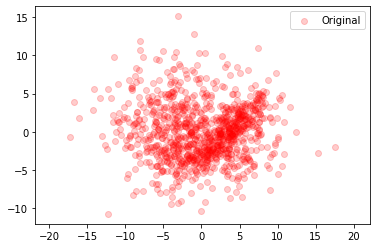

In [88]:
#8
plt.scatter(X_vis[:, 0], X_vis[:, 1], c='r',alpha=0.2) 
plt.legend(['Original', 'Transformed'])
plt.axis('equal')

###9
We can infer from this plot that the classes are not well separated. It looks like one large cluster, there is also not much of a linear relationship.

In [89]:
#10
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = .50, random_state=0)

In [90]:
from sklearn.neighbors import KNeighborsClassifier 

In [91]:
#11. Fit a KNN model
kModel = KNeighborsClassifier(n_neighbors=1) 
kModel.fit(Xtrain, ytrain)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [93]:
ypred = kModel.predict(Xtest)
print(kModel.predict(Xtest))

[1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.

In [94]:
accuracy_score(ytest, ypred)

0.94

In [96]:
#12
class_pca = PCA(n_components=30) 

In [97]:
#13 
class_pca.fit(Xtrain)

PCA(n_components=30)

In [99]:
#14 
Xtrain2 = class_pca.transform(Xtrain)

In [100]:
Xtrain2.shape

(500, 30)

In [105]:
#15 
class_pca.explained_variance_ratio_

array([3.56099673e-01, 1.94443180e-01, 1.49550250e-01, 1.04659495e-01,
       6.31197147e-02, 1.63711790e-02, 1.53057128e-02, 1.40669538e-02,
       1.36856747e-02, 1.33696801e-02, 1.28895254e-02, 1.23082152e-02,
       1.20131890e-02, 1.13329458e-02, 1.07846108e-02, 8.48916977e-33,
       5.10469628e-33, 4.60759506e-33, 2.89734126e-33, 2.17340688e-33,
       2.17340688e-33, 2.17340688e-33, 2.17340688e-33, 2.17340688e-33,
       2.17340688e-33, 2.17340688e-33, 2.17340688e-33, 2.17340688e-33,
       2.17340688e-33, 9.54691688e-34])

In [106]:
#16a
t_kModel = KNeighborsClassifier(n_neighbors=1)
t_kModel.fit(Xtrain2, ytrain) 

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [107]:
#16b
Xtest2 = class_pca.transform(Xtest) 

In [108]:
#16c 
ypred2 = t_kModel.predict(Xtest2) 

In [109]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       250
         1.0       0.95      0.93      0.94       250

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



###16d 

The accuracy on Xtest2 is surprising because we used a diffenent number of components than we did for the visualization but we got the same results for accuracy

In [114]:
from sklearn.model_selection import GridSearchCV 

In [118]:
eXtrain, eXtest, eytrain, eytest = train_test_split(X,y, test_size=0.5,random_state=0)

In [124]:
#17 
#Experimenting with different PCA transforms 
#Maybe create a for loop with different PCA transforms  
for i in range(1,31): 
  exp_pca = PCA(n_components=i)
  exp_pca.fit(eXtrain) 
  newXtrain = exp_pca.transform(eXtrain)
  emodel = KNeighborsClassifier(n_neighbors=1)
  emodel.fit(newXtrain,eytrain) 
  eXtest2 = exp_pca.transform(eXtest)
  eypred2 = emodel.predict(eXtest2)
  print('Experiment:', i)
  print(accuracy_score(eytest,eypred2))




/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Experiment: 1
0.55
Experiment: 2
0.59
Experiment: 3
0.892


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Experiment: 4
0.896
Experiment: 5
0.958
Experiment: 6
0.958
Experiment: 7
0.962


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Experiment: 8
0.96
Experiment: 9
0.956
Experiment: 10
0.946
Experiment: 11
0.95


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Experiment: 12
0.952
Experiment: 13
0.948
Experiment: 14
0.946


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Experiment: 15
0.94
Experiment: 16
0.94
Experiment:

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


 17
0.94
Experiment: 18
0.94
Experiment: 19
0.94


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Experiment: 20
0.94
Experiment: 21
0.94
Experiment: 22
0.94


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Experiment: 23
0.94
Experiment: 24
0.94
Experiment: 25
0.94
Experiment: 26
0.94
Experiment: 27
0.94


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Experiment: 28
0.94
Experiment: 29
0.94
Experiment: 30
0.94


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [138]:
exp_pca = PCA(n_components=7)
exp_pca.fit(eXtrain)
exp_pca.explained_variance_ratio_

array([0.35609967, 0.19444318, 0.14955025, 0.1046595 , 0.06311971,
       0.01637118, 0.01530571])

###18 
####a: The best accuracy we can get is 96.2% accuracy 
####b: This is with 7 principal components 
####c: 35% is explained by the components 